# Data manipulations

A matrix transformation is a matrix multiplication between a transformation matrix M and a data matrix D that gives you a manipulated data **matrix D' as output**.

We can use matrix multiplications to transform our data (our data points, represented as feature vectors).

## But first, some review of dot products
**row by row here**
What is being done in this cell?

* Element-wise multiply [4,5,6] and [1,2,3] and then sum
* Element-wise multiply [7,8,9] and [1,2,3] and then sum

In [2]:
import numpy as np

v = np.array([1,2,3])
print(v)
print(v.shape)
m = np.array([[4,5,6], [7,8,9]])
print(m)
print(m.shape)


print(m@v) #1*4+2*5+3*6=4+10+18=32. #(2,3)*(3,)=(2,)
#1*7+2*8+3*9=7+16+27=50
#row by row 

[1 2 3]
(3,)
[[4 5 6]
 [7 8 9]]
(2, 3)
[32 50]


And in this cell?
* 32: Element-wise multiply [4,5,6] and [1,2,3] and then sum
* 6540: Element-wise multiply [4,5,6] and [10, 100, 1000] and then sum
* 50: Element-wise multiply [7,8,9] and [1,2,3] and then sum
* 9870: Element-wise multiply [7,8,9] and [10, 100, 1000] and then sum

In [4]:
m2 = np.array([[1,2,3], [10, 100, 1000]])
print(m2,"\n")
print(m,"\n")
print(m2.T,"\n")
print(m.shape)
print(m2.T.shape)
print(m@m2.T) #(2,3) times ((3,2))=(2,2) resulting   #now doing every row times every column 
#4*10+5*100+6*1000=6540
#7+8*2+9*3=50
#70+800+9000

[[   1    2    3]
 [  10  100 1000]] 

[[4 5 6]
 [7 8 9]] 

[[   1   10]
 [   2  100]
 [   3 1000]] 

(2, 3)
(3, 2)
[[  32 6540]
 [  50 9870]]


## Load and look at our data

Let's load the used car data.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

data = np.array(np.genfromtxt('data/vehiclesNumeric.csv', delimiter=',', skip_header=1, dtype=int, encoding="utf-8"))  
print(data[:4,:4])
# get a pandas dataframe for plotting
df = pd.DataFrame(data, columns=["id", "price", "year", "odometer"])

[[7314278078       9988       2014     121259]
 [7313594854       5500       2010     114988]
 [7313219085       9500       2013     125000]
 [7311830338       9988       2014     121259]]


Let's get some **summary statistics**.

In [7]:
def getSummaryStatistics(data):
    print("min, max, mean, std per variable")
    return pd.DataFrame([data.min(axis=0), data.max(axis=0), data.mean(axis=0), data.std(axis=0)])

def getShapeType(data):
    print("shape")
    return (data.shape, data.dtype)

print(getSummaryStatistics(data))
print(getShapeType(data))

min, max, mean, std per variable
              0             1            2             3
0  7.301646e+09      0.000000  1999.000000  0.000000e+00
1  7.317071e+09  55000.000000  2021.000000  9.999999e+06
2  7.311729e+09   7978.281507  2012.381887  1.124405e+05
3  4.299268e+06   5542.906703     3.997048  2.546163e+05
shape
((3158, 4), dtype('int64'))


Let's **reduce the data** to two dimensions, just year and price.


**for output of summary statstics: column represent variable headers, rows are min first max second row mean third row etc.**

In [1]:
# How are we going to get just those two columns?
print(data.shape)
reducedData = data[:, [0,1]]#all rows just 2 and 3rd column

print(getSummaryStatistics(reducedData))
print(getShapeType(reducedData))

NameError: name 'data' is not defined

Let's plot the used car data.

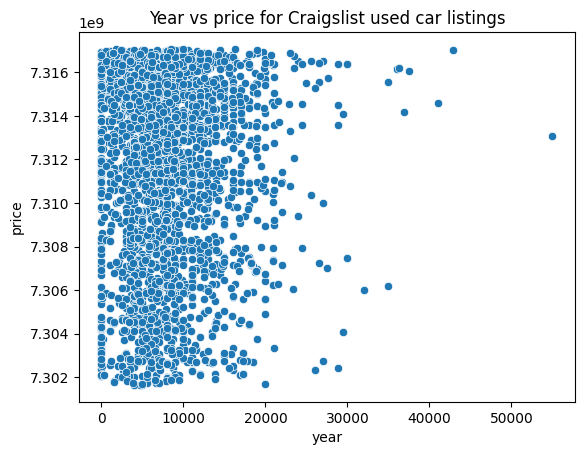

In [14]:
def plot2d(data):
    sns.scatterplot(pd.DataFrame(data[:, [0, 1]], columns=["price", "year"]), x="year", y="price").set(title="Year vs price for Craigslist used car listings")
    #all rows, column 0 and.1 which is id and price 
plot2d(reducedData)

## Translation

Translation is a kind of data transformation where we move data around, but each data point stays the same distance away from every other data point.

Translation is a two step process:
* Add homogeneous coordinate
* Do translation as matrix multiplication

### Add homogeneous coordinate

We need to add a dummy column of ones so we can do the matrix multiplication. Why? See https://www.sciencedirect.com/topics/mathematics/homogeneous-coordinate.

**homogenizedData with the column of 1s and orginal data**


In [42]:
# How do we append a whole column?
print(reducedData.shape,"\n")
print(reducedData[0])
var=np.array(np.ones(reducedData.shape[0], dtype=int).T)

print(var)
homogenizedData = np.append(reducedData, np.array([np.ones(reducedData.shape[0], dtype=int)]).T, axis=1)#axis=1 for columns 
print("homogenized data")
print(homogenizedData[:5,:5])
print(getSummaryStatistics(homogenizedData))
print(getShapeType(homogenizedData))

(3158, 2) 

[7314278078       9988]
[1 1 1 ... 1 1 1]
homogenized data
[[7314278078       9988          1]
 [7313594854       5500          1]
 [7313219085       9500          1]
 [7311830338       9988          1]
 [7311365259      10888          1]]
min, max, mean, std per variable
              0             1    2
0  7.301646e+09      0.000000  1.0
1  7.317071e+09  55000.000000  1.0
2  7.311729e+09   7978.281507  1.0
3  4.299268e+06   5542.906703  0.0
shape
((3158, 3), dtype('int64'))


### Translate

Let's **translate** that year column so that it too starts at 0.

A translation matrix for two-variable data looks like: translateTransform
$$\begin{pmatrix} 1 & 0 & x \\ 0 & 1 & y \\ 0 & 0 & 1\end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables translated, respectively.

**y changed column 2/index 1 column**

In [6]:
print(np.array([[1,0,200],[0,1, -3],[0,0,1]], dtype=int) )
print(np.array([[1,0,200],[0,1, -3],[0,0,1]], dtype=int) )



[[  1   0 200]
 [  0   1  -3]
 [  0   0   1]]


[[1 0 0]
 [0 1 0]
 [0 0 1]] 

0
transformMatrix
[[1 0 0]
 [0 1 2]
 [0 0 1]]
homogenized matrix
[[7314278078       9988          1]
 [7313594854       5500          1]
 [7313219085       9500          1]
 [7311830338       9988          1]] 

reverse of homoginized now
[[7314278078 7313594854 7313219085 ... 7307387666 7306692948 7306690733]
 [      9988       5500       9500 ...      11999       7999      10999]
 [         1          1          1 ...          1          1          1]] 

multiplying now
[[7314278078 7313594854 7313219085 ... 7307387666 7306692948 7306690733]
 [      9990       5502       9502 ...      12001       8001      11001]
 [         1          1          1 ...          1          1          1]]
after translation, transformedDataaa
hi [7314278078       9990          1]
min, max, mean, std per variable
              0             1    2
0  7.301646e+09      2.000000  1.0
1  7.317071e+09  55002.000000  1.0
2  7.311729e+09   7980.281507  1.0
3  4.299268e+06   5542.90

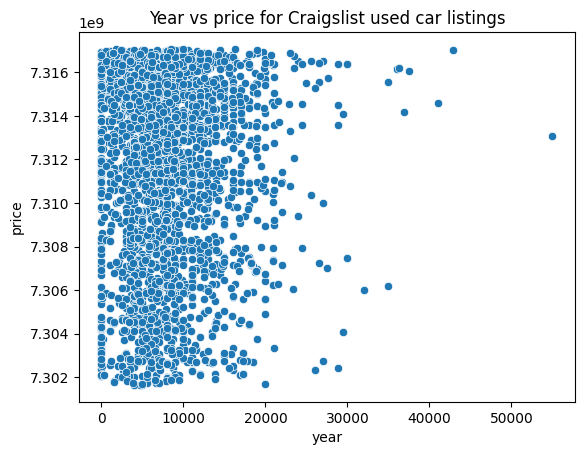

In [73]:
# we need to define a transformation matrix that will allow us to shift the price variable; this one will be the identity matrix with the translation specified in an extra last column
translateTransform = np.eye(homogenizedData.shape[1], dtype=int) #3
print(translateTransform[:5,:5],"\n")
print(-reducedData[:, 1].min()) #all rows, 2nd/last column =0.  
translateTransform[1, 2] = -reducedData[:, 1].min()
print("transformMatrix") #(3,3)
translateTransform[1, 2] = 2

print(translateTransform)
print("homogenized matrix")
print(homogenizedData[0:4],"\n") #(3158,3)
print("reverse of homoginized now")
print(homogenizedData.T[:5], "\n") #(3,3158)
print("multiplying now transform matrix with reverse of homoginized")
print(translateTransform@homogenizedData.T) #(3,3) by #(3,3158)= (3,3158)

print(np.eye([1,0,200],[0,1, -3],[0,0,1], dtype=int) )


# now we need to do the translation
transformedData = (translateTransform@homogenizedData.T).T #(3158,3)
print("after translation-- multiplication output transversed, transformedDataaa")
print("hi",transformedData[0])
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

Check:
* only the summary statistics for year should have changed
* the standard deviation for year should be the same

## Scaling

Scaling is kind of data transformation where we increase or decrease the range of one or more variables.

### Scaling on its own

Let's **scale** that year column so it's months instead of years. scale transform

A scaling matrix for two-variable data looks like:
$$\begin{pmatrix} x & 0 \\ 0 & y \end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables scaled, respectively. "\n"

**y changed column 2/1st index column**


In [8]:
print(np.array([[1.5,0],[0,2]]) )


[[1.5 0. ]
 [0.  2. ]]


[[1. 0.]
 [0. 1.]]
transformMatrix
[[ 1.  0.]
 [ 0. 12.]]
[[7314278078 7313594854 7313219085 ... 7307387666 7306692948 7306690733]
 [      9988       5500       9500 ...      11999       7999      10999]]
after scaling, transformedData
[[7.31427808e+09 1.19856000e+05]
 [7.31359485e+09 6.60000000e+04]
 [7.31321908e+09 1.14000000e+05]
 [7.31183034e+09 1.19856000e+05]]
min, max, mean, std per variable
              0              1
0  7.301646e+09       0.000000
1  7.317071e+09  660000.000000
2  7.311729e+09   95739.378087
3  4.299268e+06   66514.880434
shape
((3158, 2), dtype('float64'))


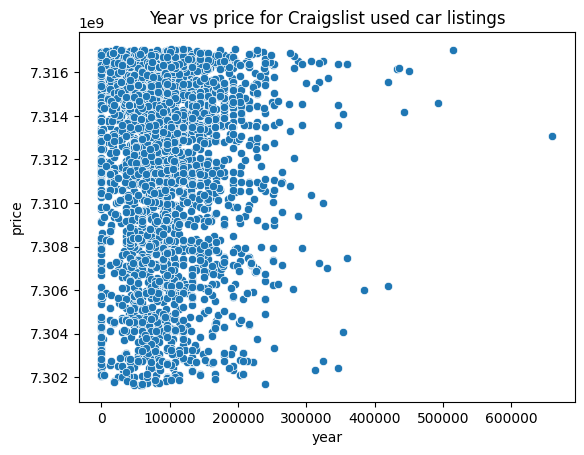

In [76]:
scaleTransform = np.eye(reducedData.shape[1], dtype=float)
print(scaleTransform)
scaleTransform[1, 1] = 12
print("transformMatrix") #(2,2)
print(scaleTransform)
print(reducedData.T[:4]) #(2, 3158)

transformedData = (scaleTransform@reducedData.T).T #(2,3158)=(3158,2)
print("after scaling, transformedData")
print(transformedData[:4])
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

Check:
* only the summary statistics for year should have changed

### Scaling together with other transformations

If you want to translate *and* scale, you just add the homogeneous coordinate into the scaling matrix too!
$$\begin{pmatrix} x & 0 & 0\\ 0 & y & 0 \\ 0 & 0 & 1 \end{pmatrix}$$



[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
transformMatrix
[[ 1.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  1.]]
transformMatrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
after scaling, transformedData
min, max, mean, std per variable
              0              1    2
0  7.301646e+09       0.000000  1.0
1  7.317071e+09  660000.000000  1.0
2  7.311729e+09   95739.378087  1.0
3  4.299268e+06   66514.880434  0.0
shape
((3158, 3), dtype('float64'))


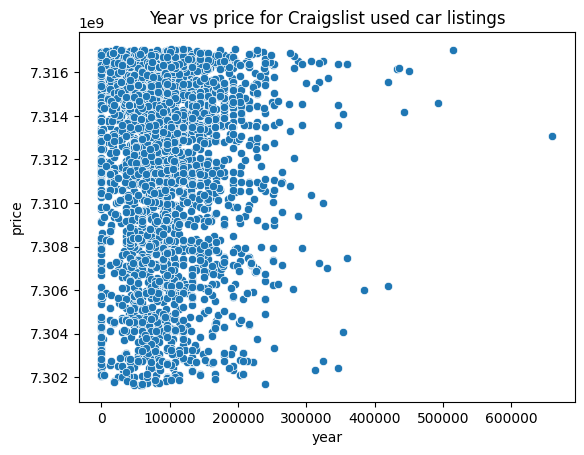

In [65]:
scaleTransform = np.eye(homogenizedData.shape[1], dtype=float)
print(scaleTransform)
scaleTransform[1, 1] = 12
print("transformMatrix")
print(scaleTransform)

translateTransform = np.eye(homogenizedData.shape[1], dtype=float)
translateTransform[1, 2] = -reducedData[:, 1].min()
print("transformMatrix")
print(translateTransform)

transformMatrix = translateTransform@scaleTransform

transformedData = (transformMatrix@homogenizedData.T).T
print("after scaling, transformedData")
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

Check:
* Although we added the homogeneous coordinate, the scaling produced the same output as before